# Importing Libraries #

In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform
from sklearn.metrics import make_scorer, f1_score

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')


## Importing Data ##

In [3]:
data = pd.read_csv('creditcard.csv')
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## Data Distribution For Class ##
In the following section we can clearly observe that there is a clear class imbalance for our target variable and a lot of outliers throughout the feature set.
1. We can use multiple models to detect fraudlent transactions such as Tree based models, Ensemble Models, Support Vector Machines, LSTM and logistic Regression  (with hyper-parameter optimization for selected models.)
2. Techniques like resampling and adjusting class weights can help improve the model's performance 

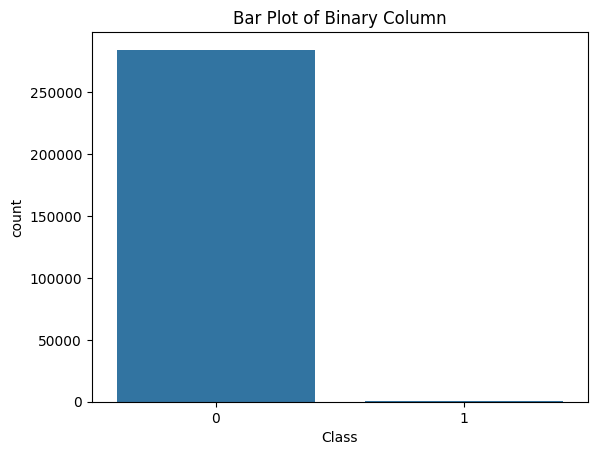

In [5]:
sns.countplot(x='Class', data=data)
plt.title('Bar Plot of Binary Column')
plt.show()

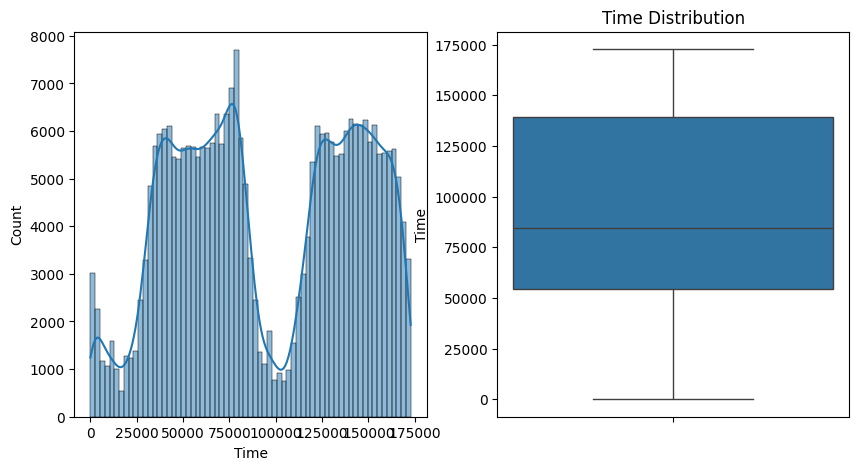

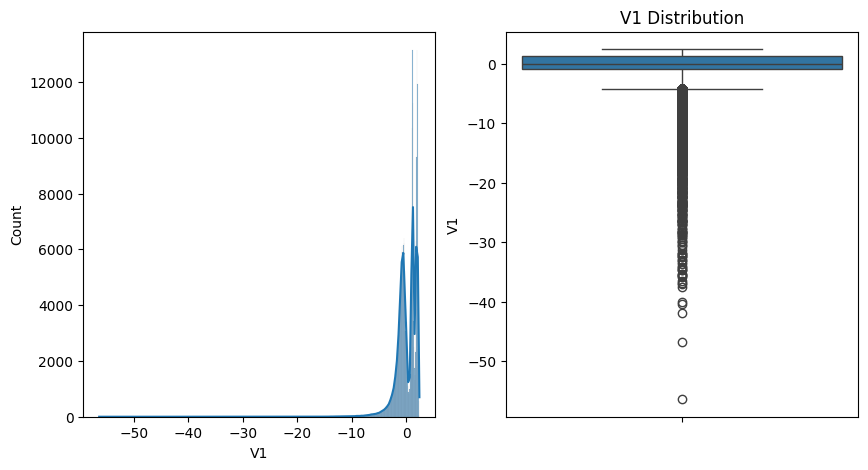

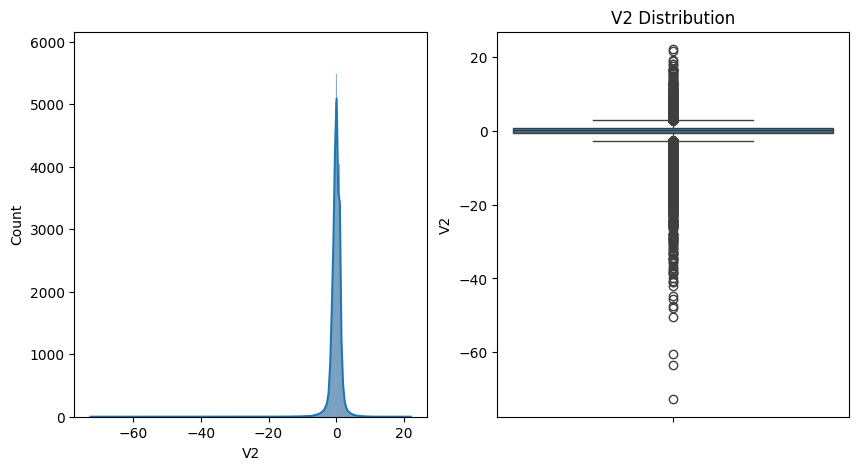

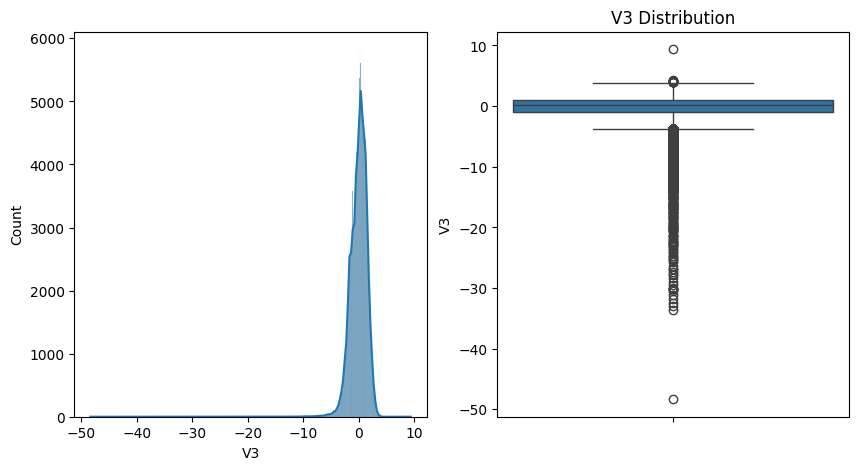

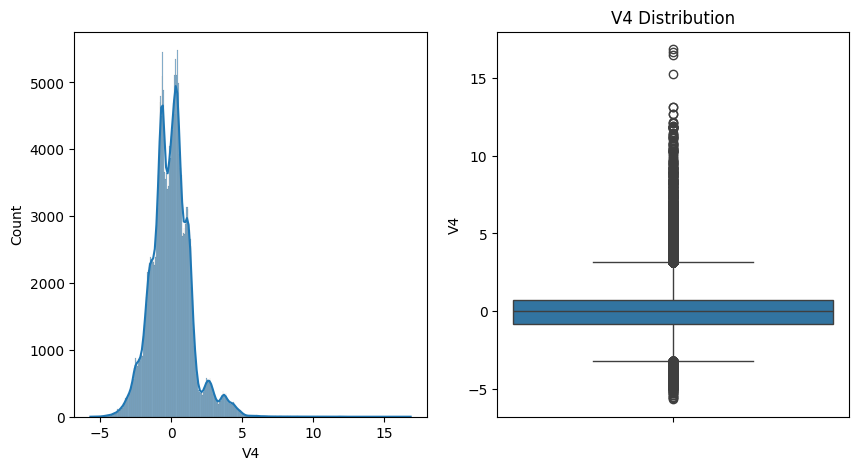

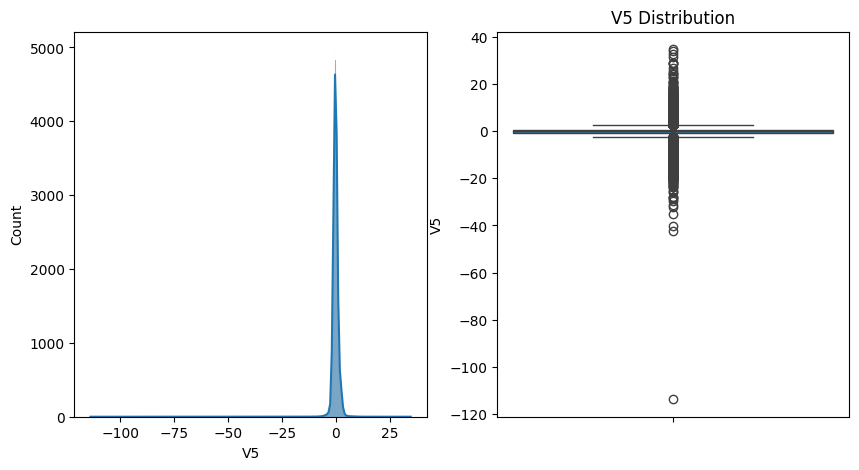

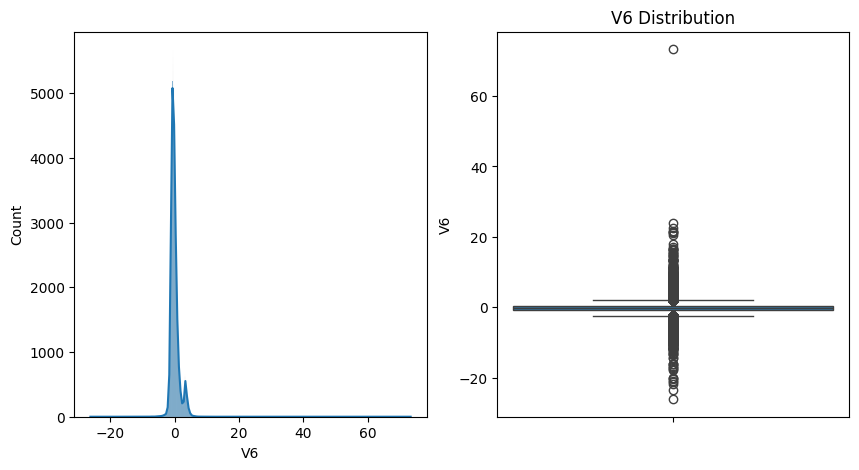

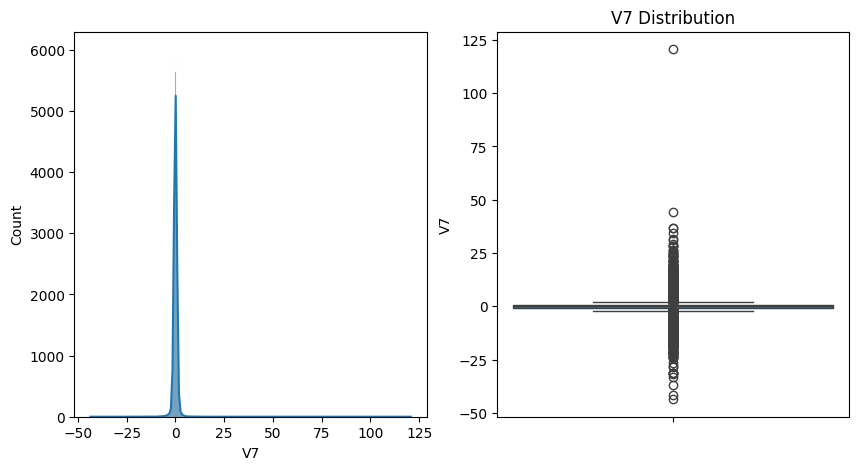

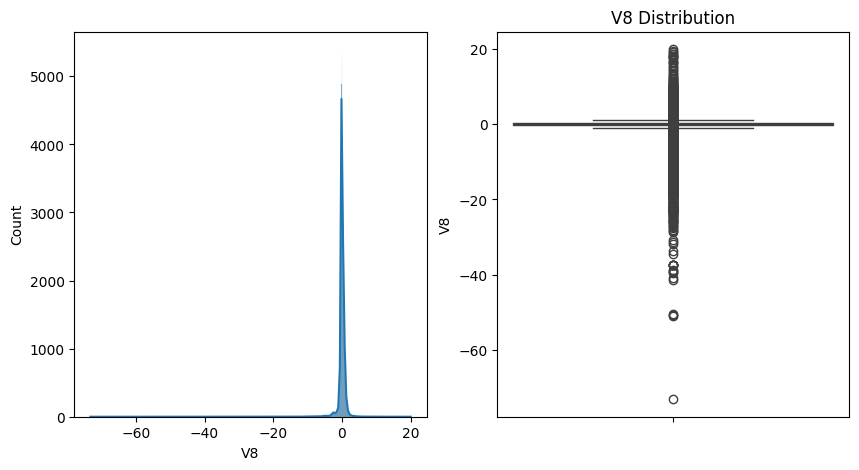

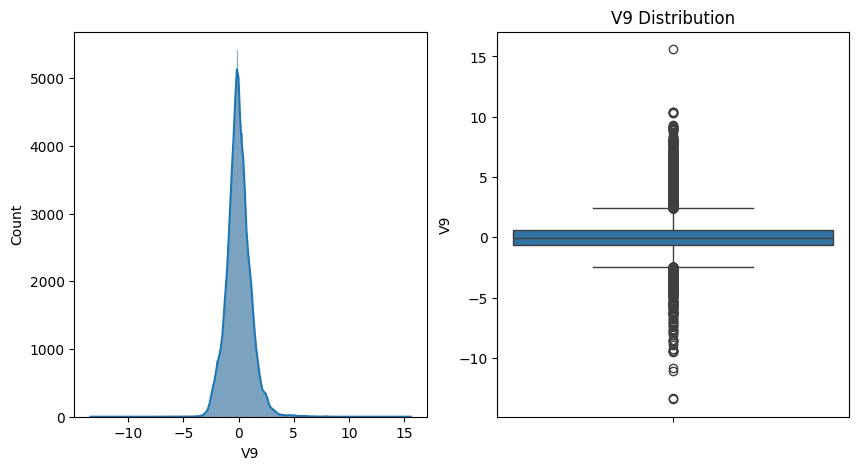

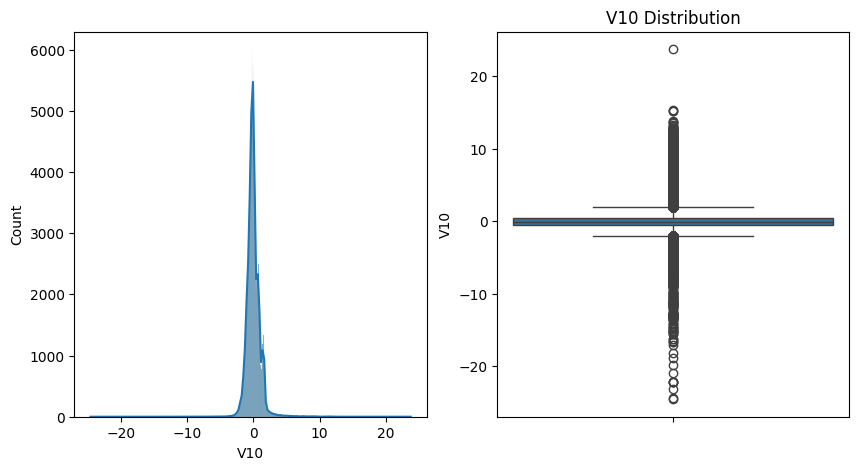

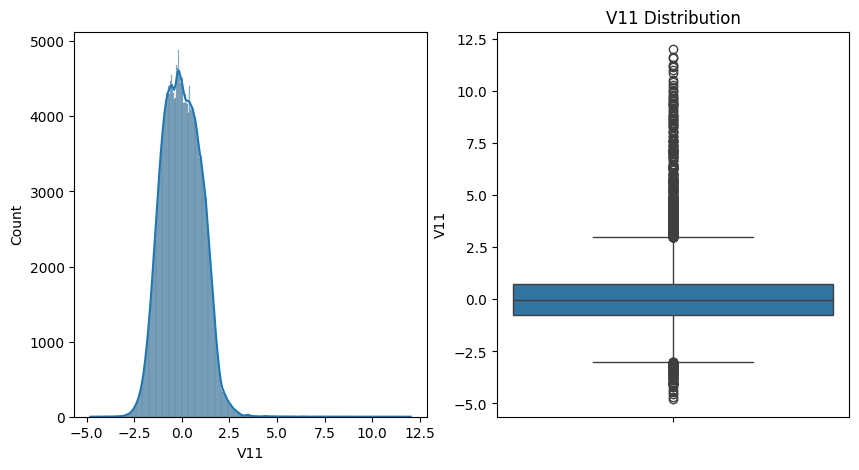

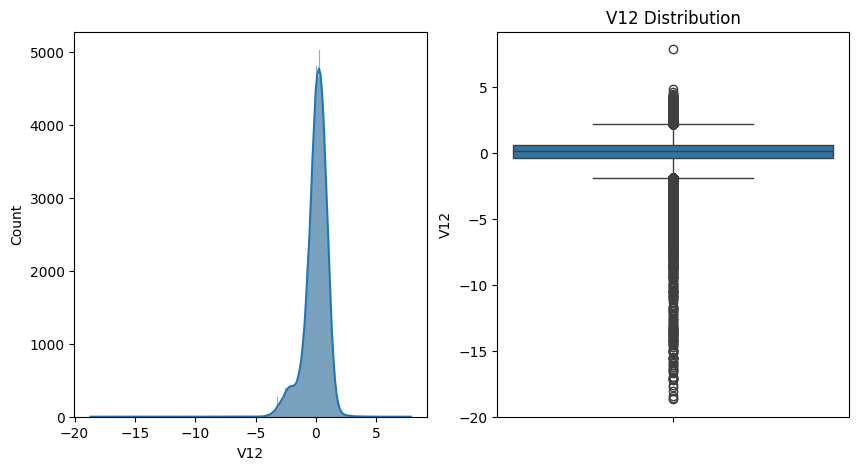

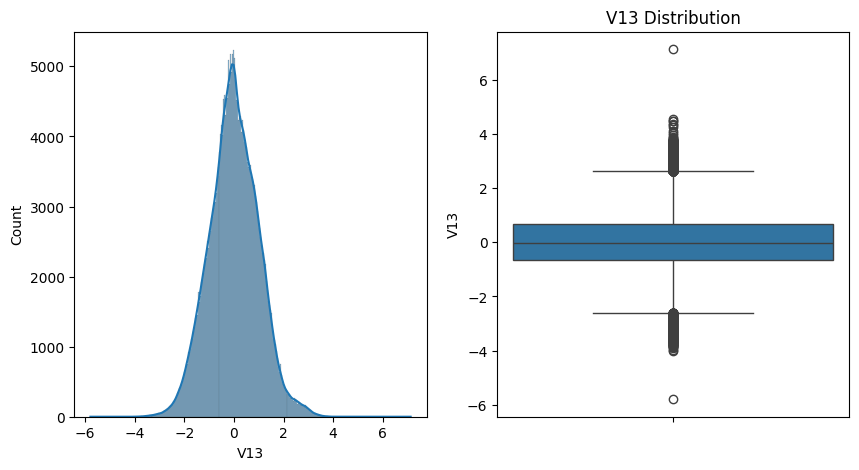

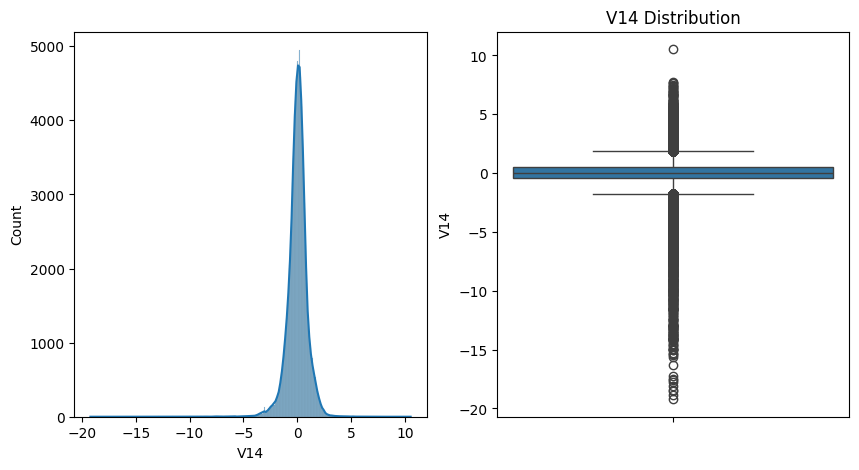

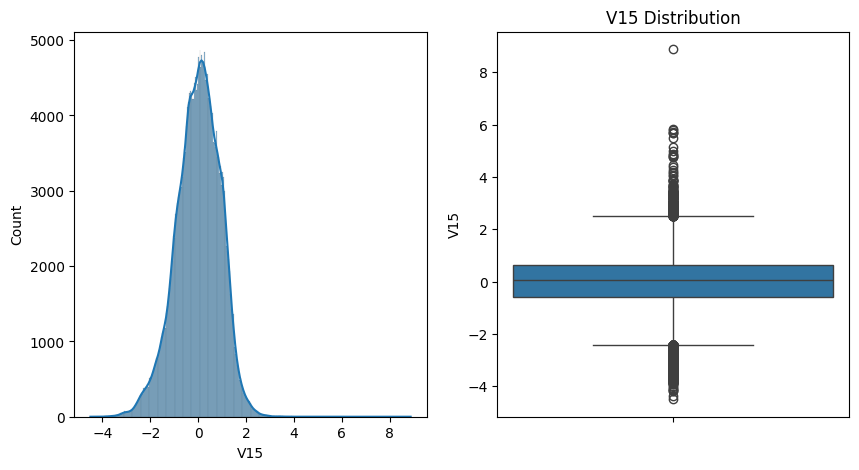

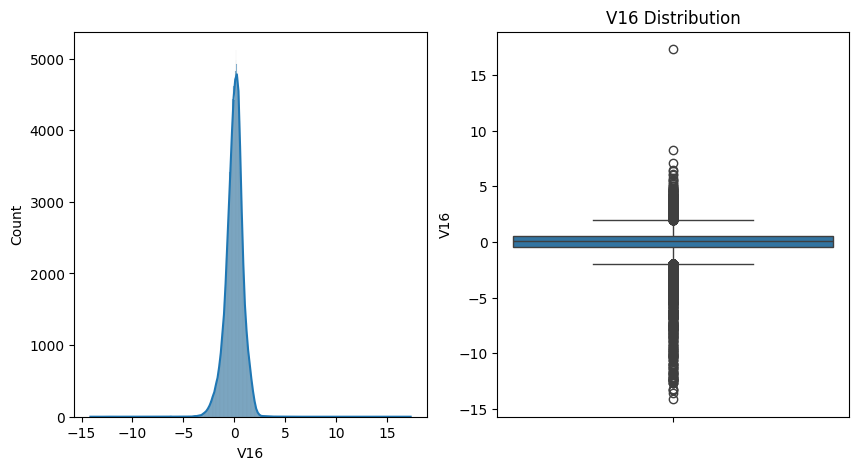

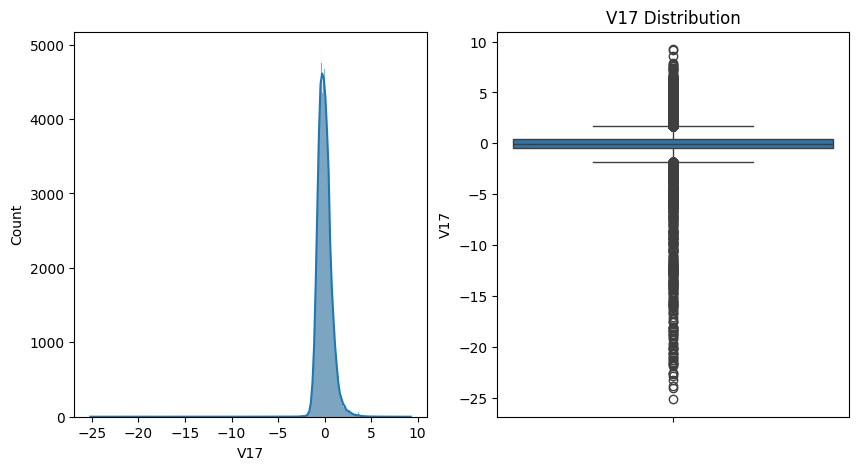

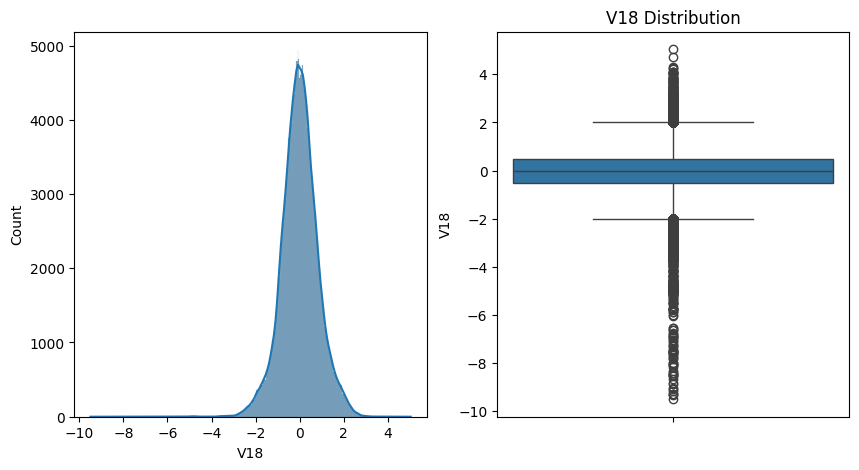

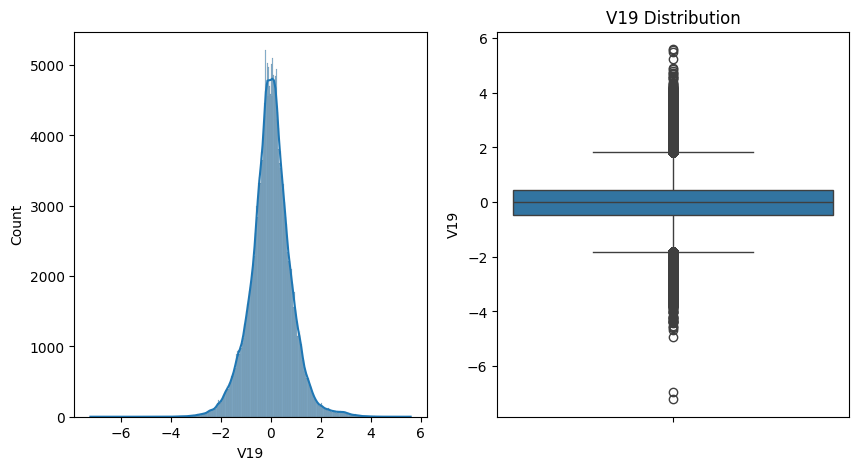

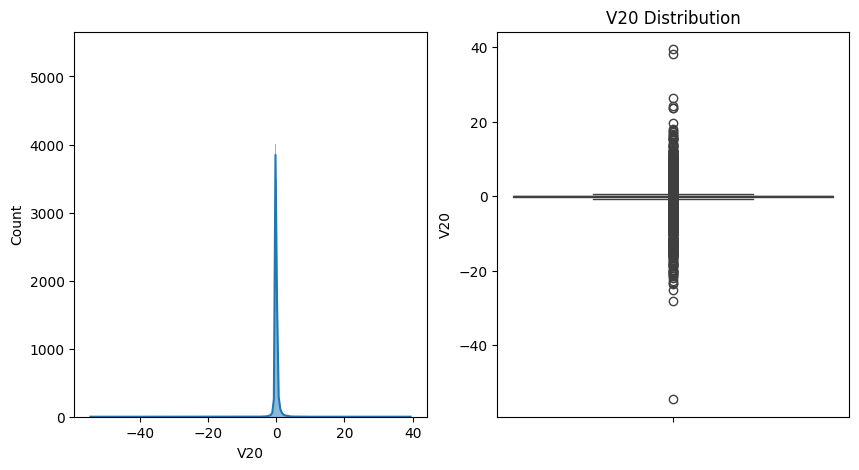

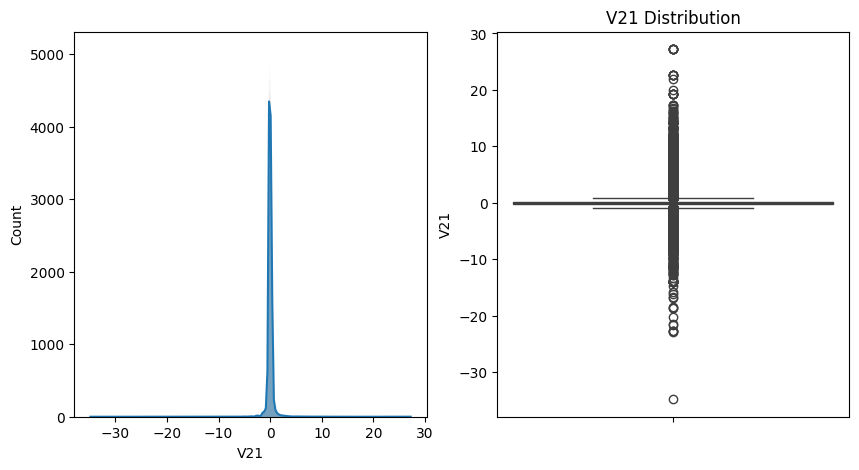

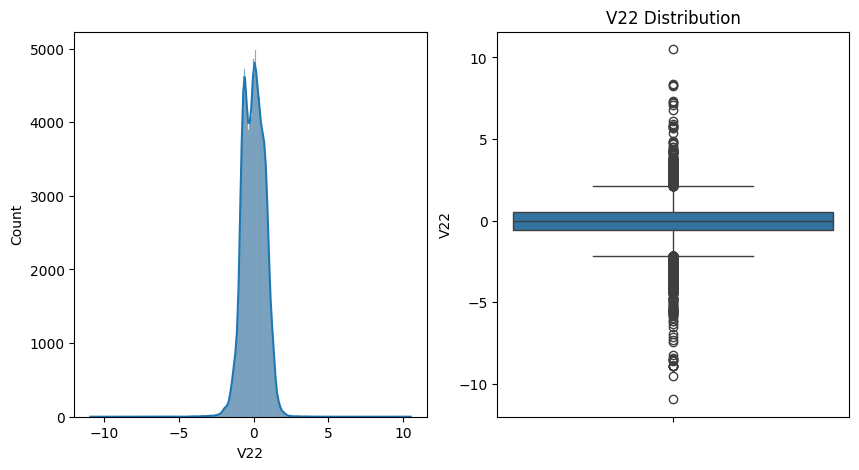

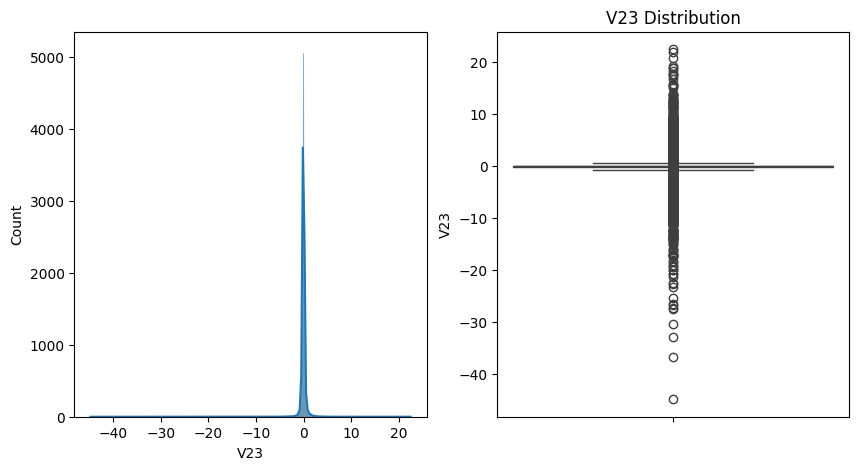

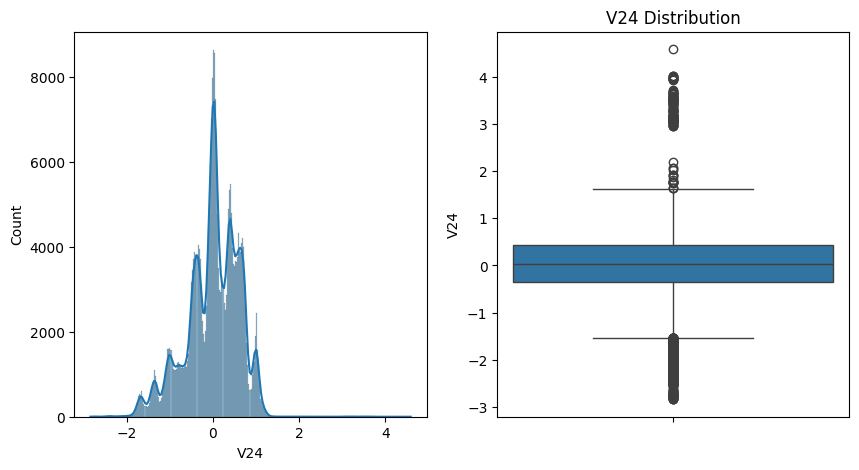

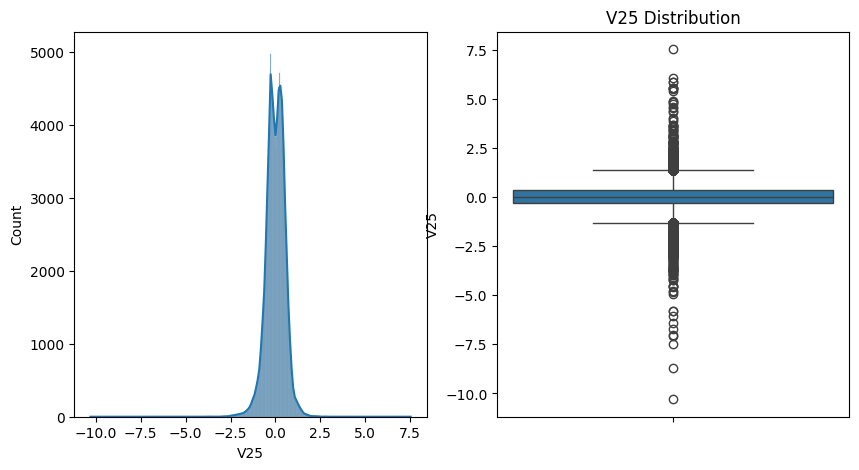

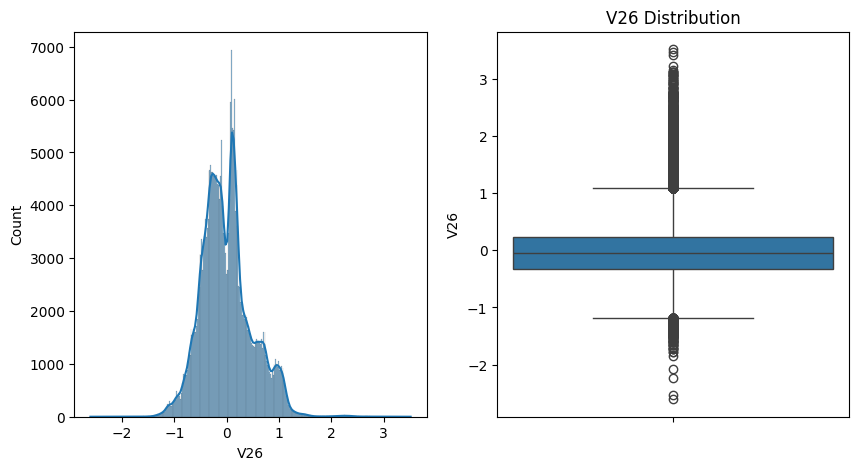

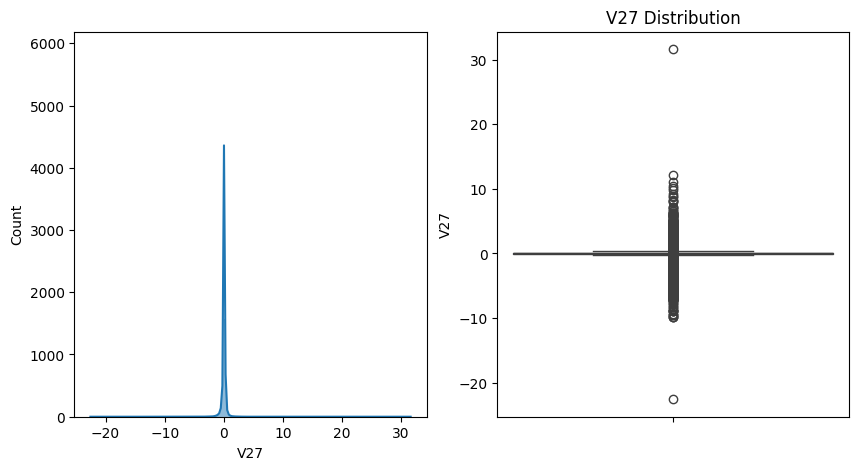

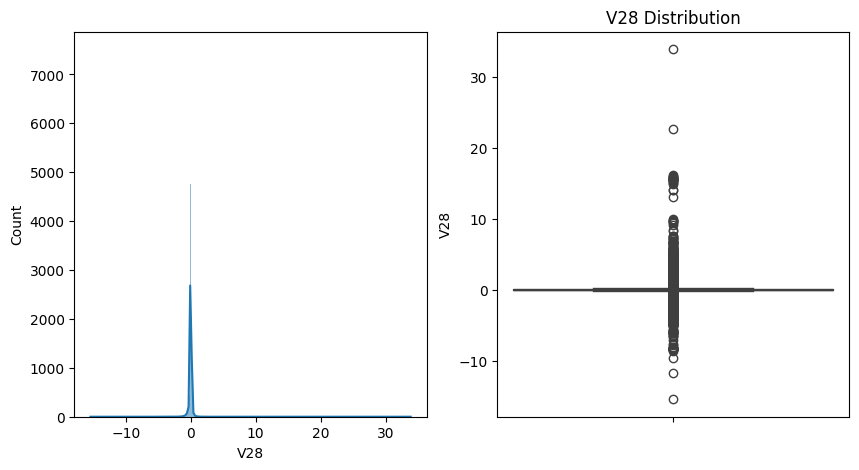

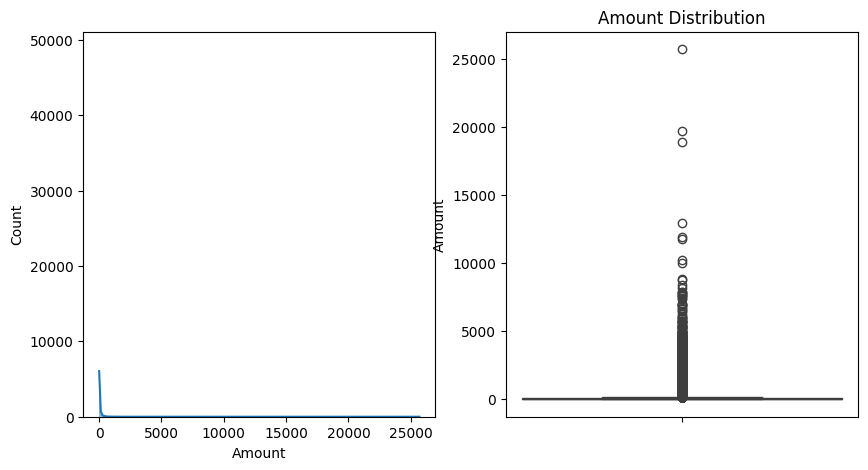

<Figure size 1000x500 with 0 Axes>

In [6]:
for c in data.columns:
    plt.figure(figsize=(10,5))
    if c == 'Class':
        continue
    plt.subplot(121)
    sns.histplot(data[c] ,kde=True)
    plt.subplot(122)
    sns.boxplot(data[c])
    plt.title(c+' Distribution')
    plt.plot()

# Resampling the data using SMOTE to handle class imbalance problem #

In [7]:
def preprocess_and_resample(data):
    # Separate features and target
    X = data.drop('Class', axis=1)
    y = data['Class']

    # Split data into training and testing sets (50% train, 50% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y, shuffle=True)

    # Scale the data for LSTM model
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  
    X_test_scaled = scaler.transform(X_test)

    # Resample the training data using SMOTE combined with Tomek Links
    
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

    # Print the distribution after resampling
    print("Resampled class distribution:")
    print(pd.Series(y_resampled).value_counts())

    return X_resampled, y_resampled, X_test_scaled, y_test

In [8]:
X_resampled, y_resampled, X_test_scaled, y_test = preprocess_and_resample(data)

Resampled class distribution:
Class
0    142157
1    142157
Name: count, dtype: int64


# Decision Tree Model #

In [9]:
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 6),        # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 3),          # Random integer between 1 and 4
    'max_features': [ 'sqrt', 'log2']
}
clf = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=param_dist, 
    n_iter=10,           # Reduced number of iterations
    cv=3,                # Reduced number of folds
    scoring='f1', 
    n_jobs=-1, 
    verbose=1,           # Reduced verbosity
    random_state=42
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best f1 Score:", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_clf = random_search.best_estimator_
y_pred_prob_tree = best_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

y_pred_tree = best_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)
class_report = classification_report(y_test, y_pred_tree)

# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best f1 Score: 0.9980910694642594
Confusion Matrix:
[[141898    260]
 [    64    182]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.41      0.74      0.53       246

    accuracy                           1.00    142404
   macro avg       0.71      0.87      0.76    142404
weighted avg       1.00      1.00      1.00    142404



# Xgboost (Ensembling Method) #

In [10]:
param_dist = {
    'n_estimators': randint(50, 200),              # Random integers for number of trees
    'max_depth': randint(3, 10),                   # Random integers for tree depth
    'learning_rate': uniform(0.01, 0.2),           # Uniform distribution for learning rate
    'subsample': uniform(0.7, 0.3),                # Uniform distribution for subsample ratio
    'colsample_bytree': uniform(0.7, 0.3),         # Uniform distribution for feature sampling ratio
    'scale_pos_weight': randint(1, 10)             # Random integers for scale_pos_weight
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,             # Number of iterations
    cv=3,                  # Number of folds in cross-validation
    scoring='f1',          # Use F1-score for scoring
    n_jobs=-1,             # Use all available cores
    verbose=1,             # Verbosity level
    random_state=42        # For reproducibility
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_clf = random_search.best_estimator_
y_pred_prob_xgb = best_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
y_pred_xgb = best_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'colsample_bytree': 0.7550213529560301, 'learning_rate': 0.07084844859190755, 'max_depth': 8, 'n_estimators': 138, 'scale_pos_weight': 1, 'subsample': 0.8574323980775167}
Best F1 Score: 0.9996694916223299
Confusion Matrix:
[[142088     70]
 [    47    199]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.74      0.81      0.77       246

    accuracy                           1.00    142404
   macro avg       0.87      0.90      0.89    142404
weighted avg       1.00      1.00      1.00    142404



# Gaussian Naive Bayes #


In [11]:
param_dist = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]  # Smoothing parameter for numerical stability
}

# Initialize the Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=nb_clf,
    param_distributions=param_dist,
    n_iter=10,             # Number of parameter settings sampled
    cv=3,                 # Number of cross-validation folds
    scoring='f1',         # Scoring metric (F1-score)
    n_jobs=-1,            # Use all available cores
    verbose=1,            # Verbosity level
    random_state=42       # For reproducibility
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_nb_clf = random_search.best_estimator_
y_pred_prob_nb = best_nb_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
y_pred_nb = best_nb_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)

# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'var_smoothing': 1e-09}
Best F1 Score: 0.9156272136979702
Confusion Matrix:
[[138915   3243]
 [    39    207]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142158
           1       0.06      0.84      0.11       246

    accuracy                           0.98    142404
   macro avg       0.53      0.91      0.55    142404
weighted avg       1.00      0.98      0.99    142404



# Logistic Regression for binary classification  #


In [12]:
param_dist = {
    'C': uniform(0.01, 10),               # Inverse of regularization strength (regularization parameter)
    'penalty': ['l2'],                    # Regularization technique (L2 is typical)
    'solver': ['liblinear', 'saga'],      # Solvers that handle regularization well
    'max_iter': [100, 200, 300]           # Maximum number of iterations for convergence
}

# Initialize the Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lr_clf,
    param_distributions=param_dist,
    n_iter=10,             # Number of parameter settings sampled
    cv=3,                  # Number of cross-validation folds
    scoring='f1',          # Scoring metric (F1-score)
    n_jobs=-1,             # Use all available cores
    verbose=1,             # Verbosity level
    random_state=42        # For reproducibility
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_lr_clf = random_search.best_estimator_
y_pred_prob_lr = best_lr_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

y_pred_lr = best_lr_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'C': 3.052422429595377, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.9593522229970682
Confusion Matrix:
[[138685   3473]
 [    24    222]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142158
           1       0.06      0.90      0.11       246

    accuracy                           0.98    142404
   macro avg       0.53      0.94      0.55    142404
weighted avg       1.00      0.98      0.99    142404



# Neural Network #

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the PyTorch model
class MLPModel(nn.Module):
    def __init__(self, input_dim, neurons, activation):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, neurons)
        self.fc2 = nn.Linear(neurons, neurons)
        self.fc3 = nn.Linear(neurons, 1)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Define a custom scikit-learn wrapper for the PyTorch model
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', activation='relu', neurons=10, batch_size=32, epochs=10):
        self.optimizer = optimizer
        self.activation = activation
        self.neurons = neurons
        self.batch_size = batch_size
        self.epochs = epochs

    def fit(self, X, y):
        # Convert to PyTorch tensors and move to GPU
        self.X_train_ = torch.tensor(X, dtype=torch.float32).to(device)
        self.y_train_ = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

        # Initialize model and move to GPU
        input_dim = self.X_train_.shape[1]
        if self.activation == 'relu':
            activation = nn.ReLU()
        elif self.activation == 'tanh':
            activation = nn.Tanh()
        else:
            activation = nn.Sigmoid()

        self.model = MLPModel(input_dim, self.neurons, activation).to(device)
        self.criterion = nn.BCELoss()

        if self.optimizer == 'adam':
            self.optimizer = optim.Adam(self.model.parameters())
        elif self.optimizer == 'rmsprop':
            self.optimizer = optim.RMSprop(self.model.parameters())
        else:
            self.optimizer = optim.SGD(self.model.parameters())

        # Training loop
        for epoch in range(self.epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(self.X_train_)
            loss = self.criterion(outputs, self.y_train_)
            loss.backward()
            self.optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs = self.model(X_tensor)
            predictions = (outputs > 0.5).float()
        return predictions.cpu().numpy().ravel()

    def predict_proba(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs = self.model(X_tensor)
        return outputs.cpu().numpy()
    
param_dist = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'neurons': [10, 20, 30, 40],
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=PyTorchClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV on the resampled training data
random_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best f1 Score:", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_model = random_search.best_estimator_
y_pred_prob_nn = best_model.predict_proba(X_test_scaled)[:, 0]

# Calculate ROC curve and AUC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
roc_auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

y_pred_nn = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)
class_report = classification_report(y_test, y_pred_nn)

# Print evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'optimizer': 'adam', 'neurons': 10, 'epochs': 100, 'batch_size': 16, 'activation': 'tanh'}
Best f1 Score: nan
Confusion Matrix:
[[135391   6767]
 [    24    222]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    142158
           1       0.03      0.90      0.06       246

    accuracy                           0.95    142404
   macro avg       0.52      0.93      0.52    142404
weighted avg       1.00      0.95      0.97    142404



# Area Under The Curve Graph #

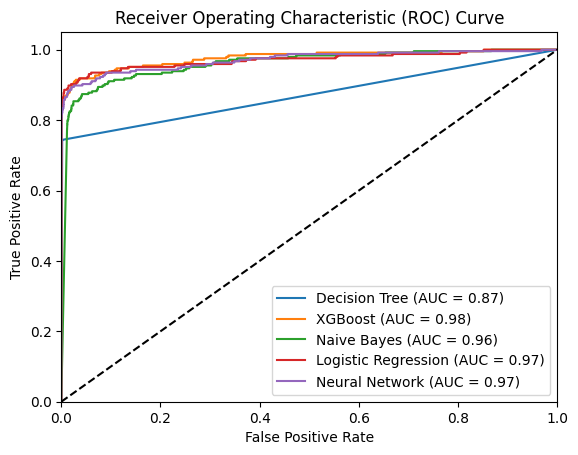

In [14]:
plot_roc_curve(fpr_tree, tpr_tree, roc_auc_tree, 'Decision Tree')
plot_roc_curve(fpr_xgb, tpr_xgb, roc_auc_xgb, 'XGBoost')
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes')
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')
plot_roc_curve(fpr_nn, tpr_nn, roc_auc_nn, 'Neural Network')

# Customize the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()